# 1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 



In [8]:
import pandas as pd
dataset= pd.read_csv('titanic.csv', sep=';')
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [9]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked",'PassengerId'], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = tree.DecisionTreeClassifier() #initiating our classifier 
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.7877094972067039


# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

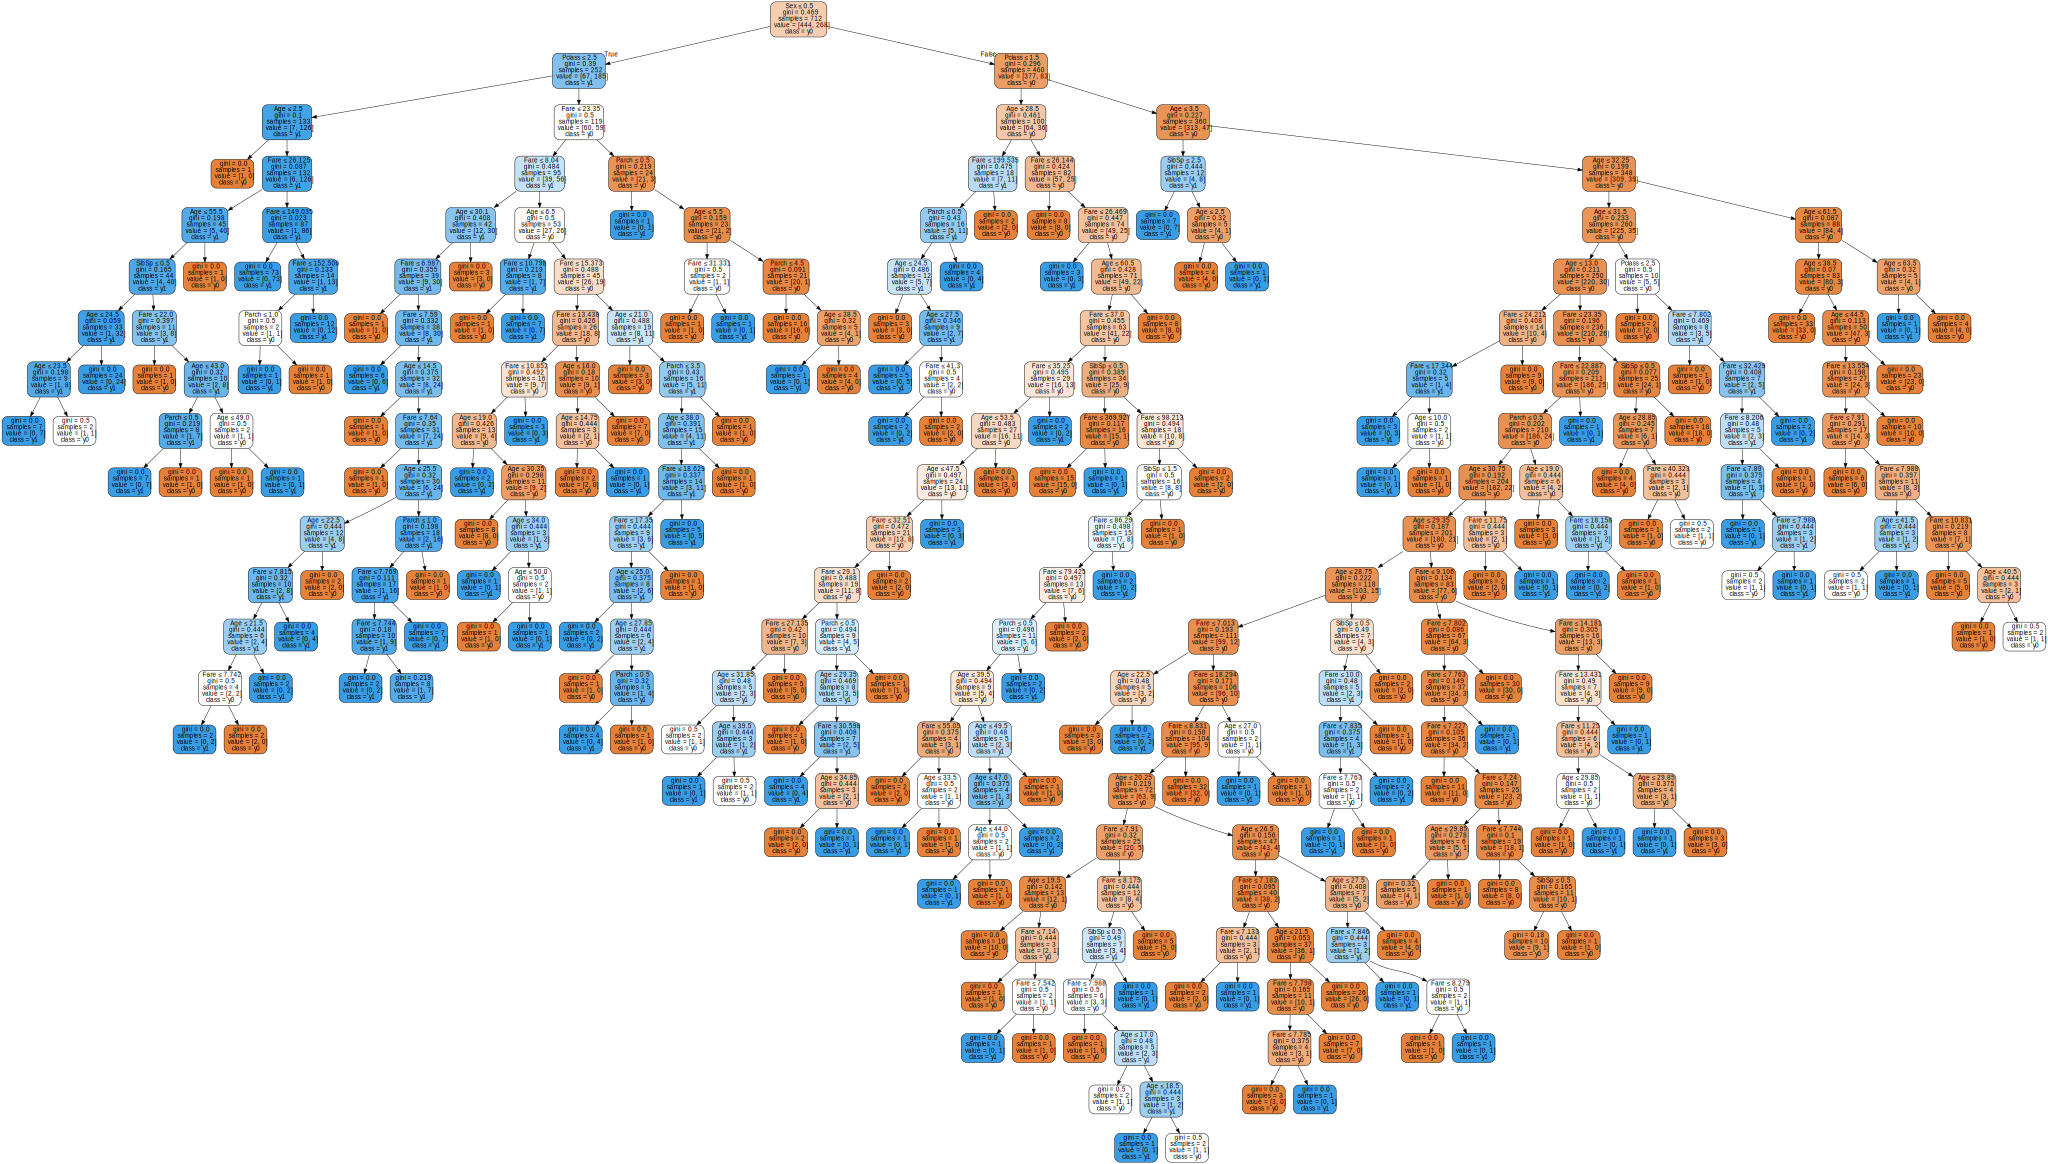

In [15]:
dot_data= tree.export_graphviz(clf,out_file= None,class_names=True,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'],
    filled=True, rounded=True, special_characters=True) 
graph= graphviz.Source(dot_data)
graph.render('data')
graph


# 3. Change the decision tree parameters(at least two parameters). 



In [11]:
#We have to purn our decision tree.
#We will change three parameters(max_leaf_nodes,min_samples_leaf and max_depth)
dtree= tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)


# 4. Calculate the new accuracy and compare it with the previous results. 


In [12]:
dtree.fit(x_train, y_train)#After pruning we have to fit our data again
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.770949720670391


#### We can see that after purning our accuracy is has decreased.


# 5. Use a random forest then change the number of estimators.

In [13]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

dtree=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decission trees.


# 6. Calculate the new accuracy and compare it with the previous result.


In [14]:
dtree.fit(x_train, y_train)  #Training our model
y_pred=dtree.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.7988826815642458


#### Our accuracy has highly increased. We can conclude that Random forest is better than Decision tree in terms of accuracy.